In [671]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

##Loading historical_data

In [672]:
historical_df = pd.read_csv('historical_data.csv')

In [673]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [674]:
historical_df.shape

(211224, 16)

In [675]:
historical_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [676]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

# Data cleaning(historical data)

##Checking for duplicates and missing values(historical data)



In [677]:
print(historical_df.duplicated().sum())
historical_df.isnull().sum()

0


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


##load fear greed index data

In [678]:
sentiment_df = pd.read_csv('fear_greed_index.csv')

In [679]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [680]:
sentiment_df.shape

(2644, 4)

In [681]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [682]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


#Data cleaning(fear greed data)

##checking for duplicates and missing values(fear greed data)

In [683]:
print(sentiment_df.duplicated().sum())
sentiment_df.isnull().sum()

0


,0
timestamp,0
value,0
classification,0
date,0


In [684]:
sentiment_df.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [685]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [686]:
sentiment_df.dtypes

,0
timestamp,int64
value,int64
classification,object
date,datetime64[ns]


In [687]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [688]:
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Fear,2018-02-04
4,1517808600,11,Fear,2018-02-05


In [689]:
historical_df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [690]:
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format = "%d-%m-%Y %H:%M")

In [691]:
historical_df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,datetime64[ns]
Start Position,float64
Direction,object
Closed PnL,float64


##Adding a date column

In [692]:
historical_df['Date'] = historical_df['Timestamp IST'].dt.date

In [693]:
historical_df[['Timestamp IST', 'Date']].dtypes

,0
Timestamp IST,datetime64[ns]
Date,object


In [694]:
historical_df['Date'] = historical_df['Timestamp IST'].dt.normalize()

In [695]:
historical_df[['Timestamp IST', 'Date']].dtypes

,0
Timestamp IST,datetime64[ns]
Date,datetime64[ns]


In [696]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


# Merging DataFrames

In [697]:
merged_df = pd.merge(historical_df, sentiment_df, left_on = 'Date', right_on = 'date', how = 'inner')

In [698]:
merged_df['win'] = merged_df['Closed PnL'] > 0

In [699]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date,win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Greed,2024-12-02,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Greed,2024-12-02,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Greed,2024-12-02,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Greed,2024-12-02,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Greed,2024-12-02,False


In [700]:
merged_df['Short_Account'] = merged_df['Account'].str[-6:]

#Creating key metrices for DATA ANALYSIS

##1. Avg pnl for different sentiments

In [722]:
avg_pnl_sentiment = (
    merged_df
    .groupby('classification')['Closed PnL']
    .mean()
    .reset_index()
)

avg_pnl_sentiment

,classification,Closed PnL
0,Fear,49.212077
1,Greed,53.882281
2,Neutral,34.307718


##2. Win Rate by sentiment

In [702]:
merged_df['win'] = merged_df['Closed PnL'] > 0

In [703]:
win_rate_sentiment = (
    merged_df
    .groupby('classification')['win']
    .mean()
    .reset_index()
)

win_rate_sentiment['Win_Rate_%'] = win_rate_sentiment['win'] * 100

win_rate_sentiment

,classification,win,Win_Rate_%
0,Fear,0.407871,40.787150
1,Greed,0.420311,42.031120
2,Neutral,0.396991,39.699093


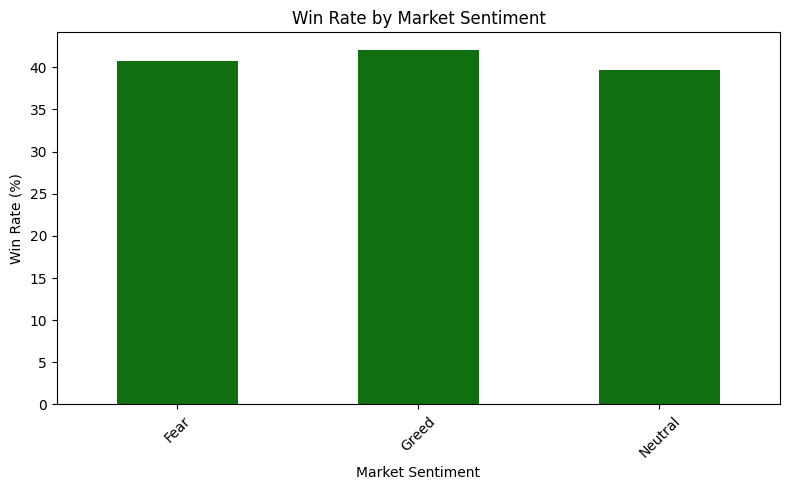

In [750]:

plt.figure(figsize=(8,5))

sns.barplot(data=win_rate_sentiment,
            x='classification',
            y='Win_Rate_%',color = 'green',width=0.5)

plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Yes, performance does differ by sentiment.
###Traders perform better during strong sentiment days (Fear or Greed) and comparatively worse during Neutral market conditions.

##------------------------------------------------------------------------------

##3. Impact of sentiment on Average trade size

In [705]:
avg_volume = merged_df.groupby('classification')['Size USD'].mean().reset_index()

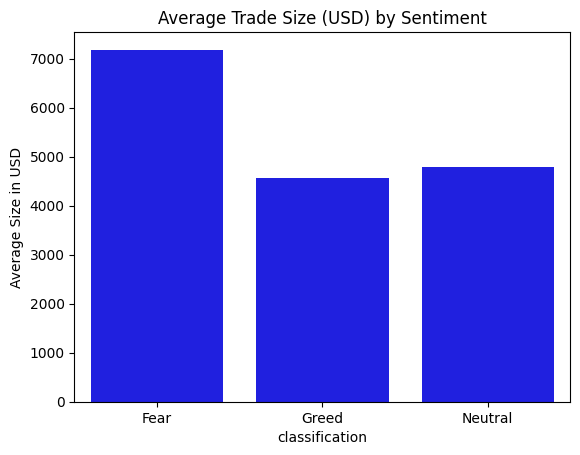

In [706]:
sns.barplot(data=avg_volume, x='classification', y='Size USD',color='blue')
plt.title('Average Trade Size (USD) by Sentiment')
plt.ylabel('Average Size in USD')
plt.show()

###Average trade size (used as a leverage proxy) is highest during Fear days and lower during Neutral and Greed days, indicating that traders take larger risk exposure in fearful market conditions.
## **Strategy idea -1** :**Adjust Leverage During Fear Days**
###During Fear days, traders usually trade bigger (high leverage). So, high-leverage traders should reduce their trade size to avoid big losses, while low-leverage traders can keep trading normally.

#-------------------------------------------------------------------------

### Average Number of trade per day

In [707]:
trades_per_day = (
    merged_df
    .groupby('Date')['Trade ID']
    .count()
    .reset_index()
    .rename(columns={'Trade ID': 'Trades_Per_Day'})
)

In [708]:
avg_trades_per_day = trades_per_day['Trades_Per_Day'].mean()
print(avg_trades_per_day)

440.9561586638831


##4. Impact of sentiment on trade frequency

In [709]:
trade_frequency = (
    merged_df
    .groupby('classification')['Trade ID']
    .count()
    .reset_index()
    .rename(columns={'Trade ID': 'Trade_Count'})
)

trade_frequency

,classification,Trade_Count
0,Fear,83237
1,Greed,90295
2,Neutral,37686


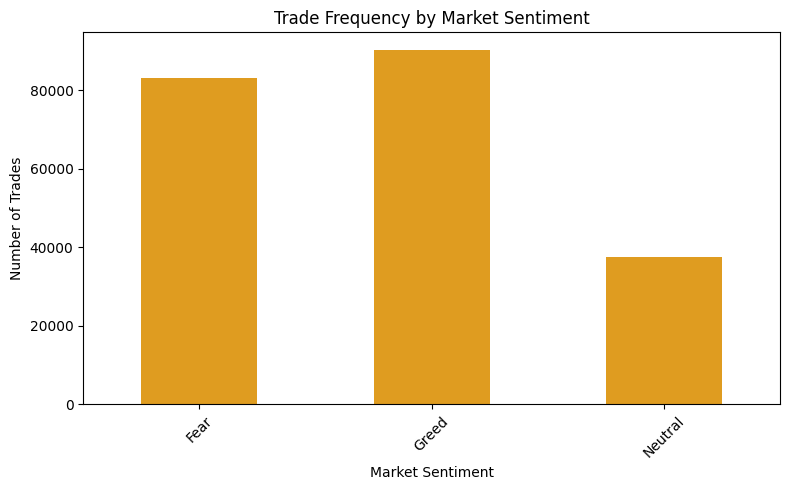

In [751]:
plt.figure(figsize=(8,5))

sns.barplot(data=trade_frequency,
            x='classification',
            y='Trade_Count',
            color = 'orange',width = 0.5)

plt.title('Trade Frequency by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### It concludes that in strong emotions like fear or greed the traders trade in high frequncy


##5. Long short ratio by sentiment

In [727]:
long_short_df = merged_df[
    merged_df['Direction'].isin(['Open Long', 'Close Long',
                                 'Open Short', 'Close Short'])
]

In [728]:
long_short_bias = (
    long_short_df
    .groupby(['classification', 'Direction'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

top4_long_short = long_short_bias.head(4)

top4_long_short

,classification,Direction,Count
2,Fear,Open Long,24829
0,Fear,Close Long,23501
7,Greed,Open Short,19327
5,Greed,Close Short,17819


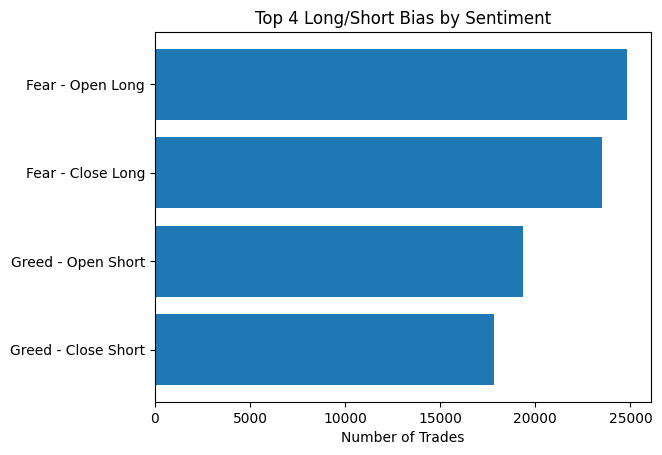

In [729]:
plt.figure()
plt.barh(top4_long_short['classification'] + ' - ' + top4_long_short['Direction'],
         top4_long_short['Count'])

plt.xlabel('Number of Trades')
plt.title('Top 4 Long/Short Bias by Sentiment')
plt.gca().invert_yaxis()
plt.show()

##**Strategy Idea 2 : Trade Frequency and Long/Short Bias**
##During Fear days, traders show a strong long bias (more open/close long trades), while during Greed days, short positions dominate. Frequent traders can focus on taking long positions during Fear days to capitalize on market reversals, while infrequent traders should avoid impulsive trades during Greed days to reduce risk.

#-------------------------------------------------------------------------------

##6. Segmentation analysis

### High leverage vs low leverage traders

In [735]:
leverage_df = (
    merged_df
    .groupby('Account')['Size USD']
    .mean()
    .reset_index()
    .rename(columns={'Size USD': 'Avg_Trade_Size'})
)
median_leverage = leverage_df['Avg_Trade_Size'].median()

In [736]:
leverage_df['Leverage_Segment'] = leverage_df['Avg_Trade_Size'].apply(
    lambda x: 'High Leverage' if x >= median_leverage else 'Low Leverage'
)

leverage_df.shape

(32, 3)

In [733]:
leverage_df['Leverage_Segment'].value_counts()

,count
Leverage_Segment,
High Leverage,16
Low Leverage,16


###Frequent vs Infrequent Tradera

In [737]:
frequency_df = (
    merged_df
    .groupby('Short_Account')['Trade ID']
    .count()
    .reset_index()
    .rename(columns={'Trade ID': 'Trade_Count'})
)

In [739]:
median_trades = frequency_df['Trade_Count'].median()

frequency_df['Frequency_Segment'] = frequency_df['Trade_Count'].apply(
    lambda x: 'Frequent Trader' if x >= median_trades else 'Infrequent Trader'
)

frequency_df['Frequency_Segment'].value_counts()

,count
Frequency_Segment,
Infrequent Trader,16
Frequent Trader,16


###Consistent vs Incosistent trader

In [740]:
win_df = (
    merged_df
    .groupby('Short_Account')['win']
    .mean()
    .reset_index()
    .rename(columns={'win': 'Win_Rate'})
)

In [743]:
median_win = win_df['Win_Rate'].median()

win_df['Performance_Segment'] = win_df['Win_Rate'].apply(
    lambda x: 'Consistent Winner' if x >= median_win else 'Inconsistent Trader'
)

win_df['Performance_Segment'].value_counts()

,count
Performance_Segment,
Inconsistent Trader,16
Consistent Winner,16


###The segmentation by leverage, trade frequency, and win rate was based on a median split, which ensures an even division of traders into two groups. Therefore, each segment contains an equal number of traders.

###7. Buy vs Sell Trade Distribution Across Sentiment Categories

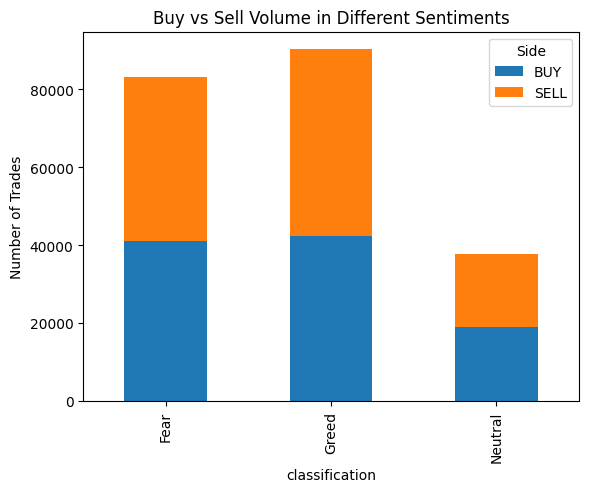

In [718]:
side_counts = merged_df.groupby(['classification', 'Side']).size().unstack()

side_counts.plot(kind='bar', stacked=True)
plt.title('Buy vs Sell Volume in Different Sentiments')
plt.ylabel('Number of Trades')

plt.show()

In [719]:
merged_df['Coin'].value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


##8. Sentiment Distribution for the Most Traded Coin ({top_coin})

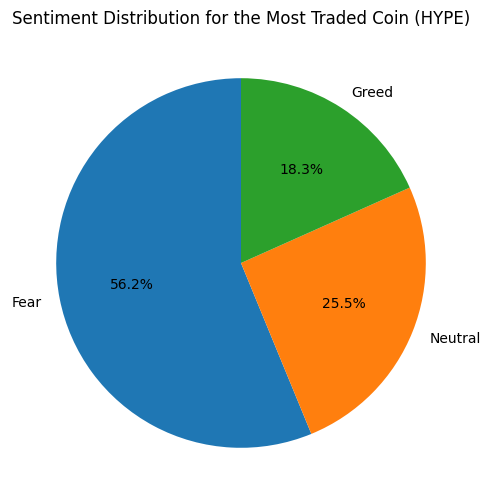

In [720]:
top_coin = merged_df['Coin'].value_counts().idxmax()
coin_df = merged_df[merged_df['Coin'] == top_coin]

coin_sentiment_counts = coin_df['classification'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(coin_sentiment_counts, labels=coin_sentiment_counts.index,autopct='%1.1f%%', startangle=90)
plt.title(f"Sentiment Distribution for the Most Traded Coin ({top_coin})")
plt.show()

##9. Top 10 Traded Coins by Sentiment'

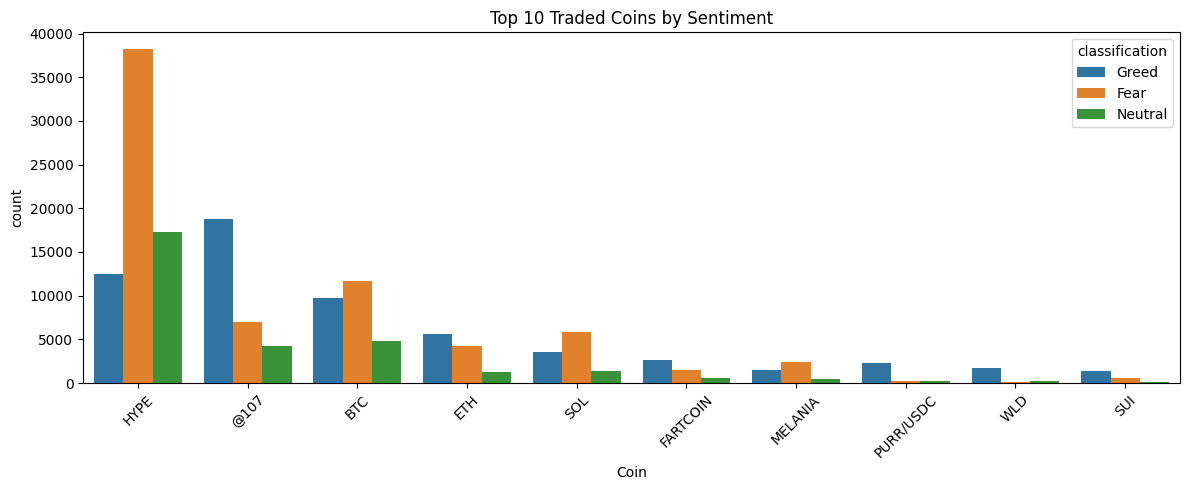

In [721]:
top_coins = merged_df['Coin'].value_counts().nlargest(10).index

plt.figure(figsize=(12,5))
sns.countplot(
    data=merged_df[merged_df['Coin'].isin(top_coins)],
    x='Coin',
    hue='classification',
    order=top_coins
)
plt.title('Top 10 Traded Coins by Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Creating a Predictive model

In [747]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

merged_df['Profit_Bucket'] = merged_df['win'].astype(int)

le = LabelEncoder()
merged_df['classification_enc'] = le.fit_transform(merged_df['classification'])

merged_df['Long_Bias'] = merged_df['Direction'].apply(lambda x: 1 if 'Long' in x else 0)
merged_df['Short_Bias'] = merged_df['Direction'].apply(lambda x: 1 if 'Short' in x else 0)

features = ['classification_enc', 'Size USD', 'Long_Bias', 'Short_Bias']
X = merged_df[features]
y = merged_df['Profit_Bucket']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)


# 6. Evaluate
print(classification_report(y_test, y_pred))

[1 0 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     24848
           1       0.55      0.54      0.55     17396

    accuracy                           0.63     42244
   macro avg       0.62      0.62      0.62     42244
weighted avg       0.63      0.63      0.63     42244



#clustering

In [748]:
from sklearn.cluster import KMeans

# Aggregate trader-level features
trader_df = merged_df.groupby('Short_Account').agg({
    'Size USD':'mean',
    'Trade ID':'count',
    'win':'mean'
}).rename(columns={'Size USD':'Avg_Trade_Size',
                   'Trade ID':'Trade_Count',
                   'win':'Win_Rate'}).reset_index()

# KMeans clustering into 3 types
kmeans = KMeans(n_clusters=3, random_state=42)
trader_df['Cluster'] = kmeans.fit_predict(trader_df[['Avg_Trade_Size','Trade_Count','Win_Rate']])

trader_df

,Short_Account,Avg_Trade_Size,Trade_Count,Win_Rate,Cluster
0,0a3b7f,6279.002287,1911,0.330194,1
1,1170d4,2600.778049,9893,0.810876,1
2,18264a,746.725651,975,0.431795,1
3,2a9012,16159.576734,3818,0.359612,0
4,2c00e0,2066.689209,417,0.573141,1
5,4011dd,3138.894782,3239,0.519914,1
6,437aab,1844.211886,40184,0.428230,2
7,486cf6,3445.471265,332,0.475904,1
8,5ba5bd,1653.226327,7280,0.442720,1
9,5cae3c,4790.575486,3589,0.327668,1


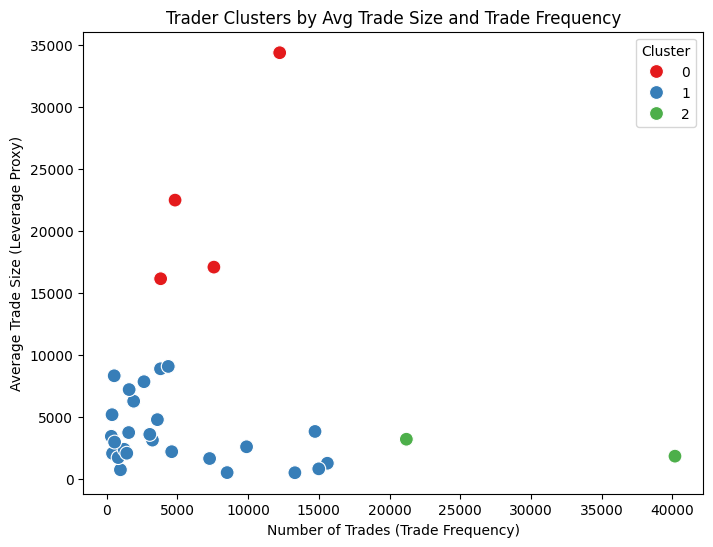

In [749]:
# 2D Cluster plot: Avg Trade Size vs Trade Count
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=trader_df,
    x='Trade_Count',
    y='Avg_Trade_Size',
    hue='Cluster',
    palette='Set1',
    s=100
)

plt.title("Trader Clusters by Avg Trade Size and Trade Frequency")
plt.xlabel("Number of Trades (Trade Frequency)")
plt.ylabel("Average Trade Size (Leverage Proxy)")
plt.legend(title="Cluster")
plt.show()